In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import cluster, datasets, mixture
from sklearn import preprocessing

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("../preprocessed_data/preprocessed_train.csv")

In [3]:
def make_PCA(data, num_components = 3):
    
    pca = PCA(n_components=num_components)
    transformed_data = pca.fit_transform(data)
    print(pca.explained_variance_)
    return transformed_data, pca

In [4]:
X, pca = make_PCA(data)
X = pd.DataFrame(X)

[1.95337086 1.17079036 1.07755963]


In [5]:
pca.explained_variance_ratio_

array([0.22781728, 0.13654666, 0.12567337])

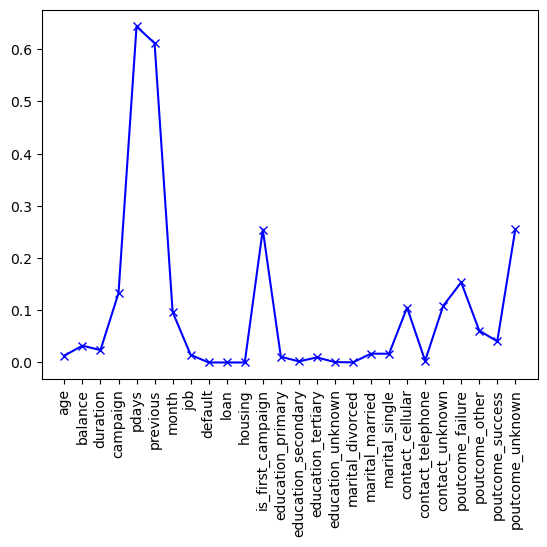

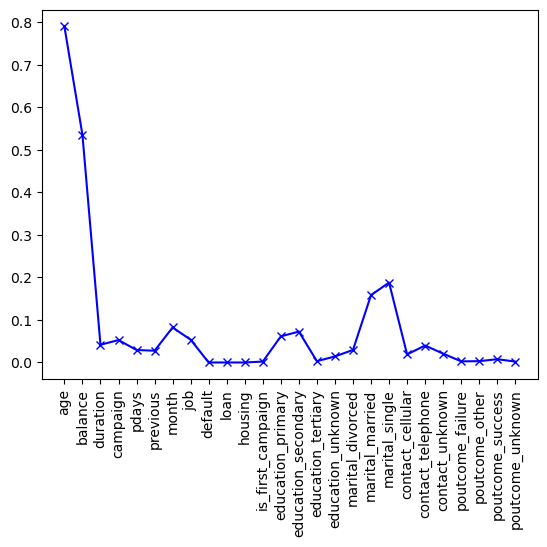

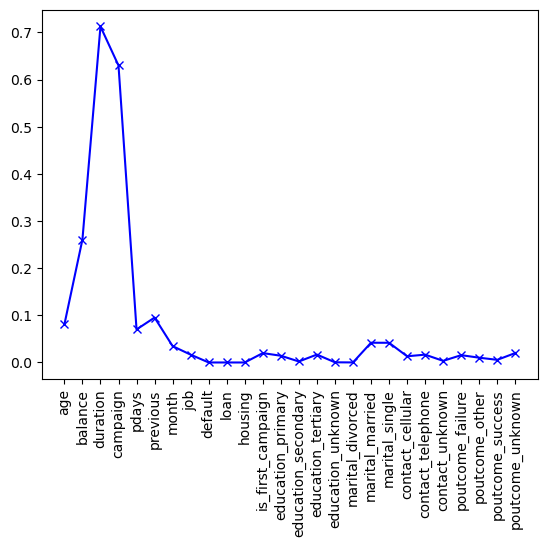

In [6]:
a = abs(pca.components_)[0]
b = abs(pca.components_)[1]
c = abs(pca.components_)[2]

plt.plot(data.columns, a, 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(data.columns, b, 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(data.columns, c, 'bx-')
plt.xticks(rotation = 90)
plt.show()

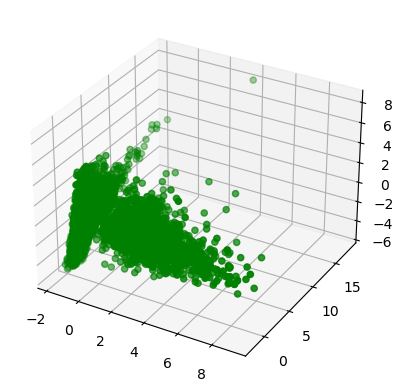

In [7]:
# %matplotlib notebook
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.view_init()
plot2 = ax1.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], color='green')

plt.show()

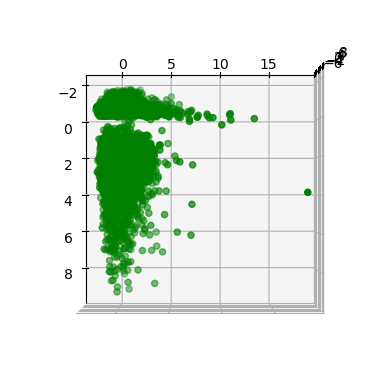

In [8]:
# %matplotlib notebook
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.view_init(90,0)
plot2 = ax1.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], color='green')

plt.show()

# K - means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [10]:
def metrics_plots(max_k=10):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        score.append(kmeans.score(X))
        score_kmeans_s.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
        score_kmeans_c.append(calinski_harabasz_score(X, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(X, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        plt.plot(x_ticks, list_scores[i], 'bx-')
        plt.xlabel('k')
        plt.ylabel(list_title[i])
        plt.title('Optimal k')
        plt.show()

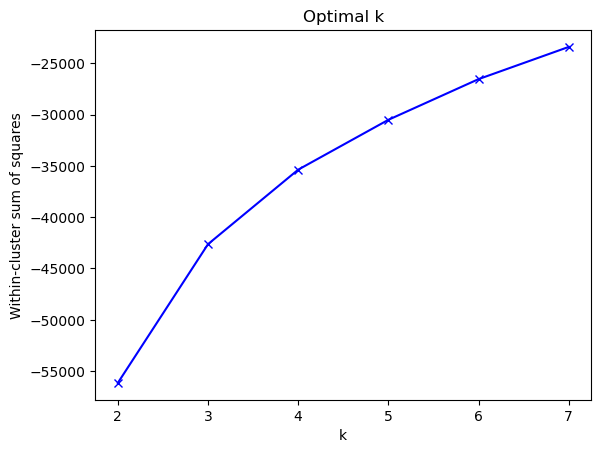

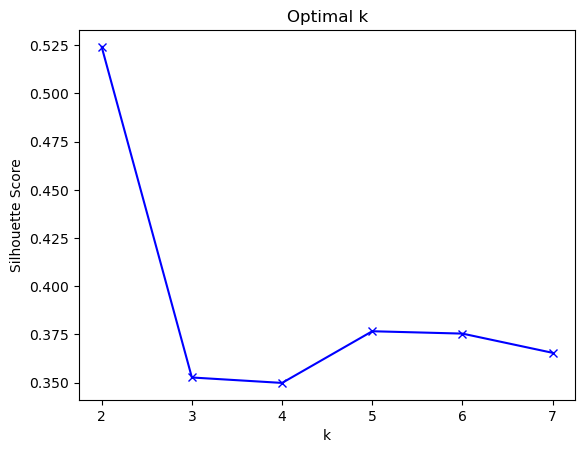

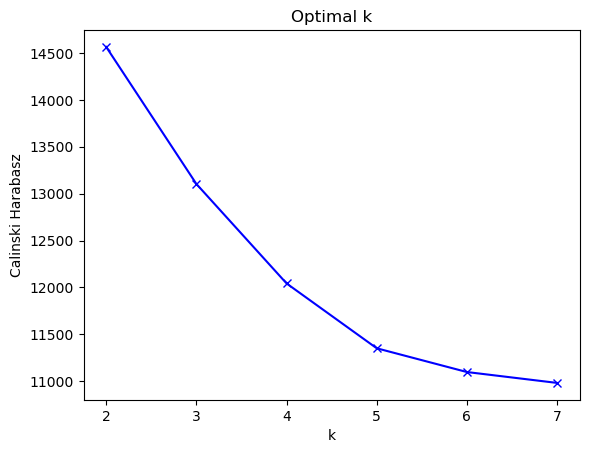

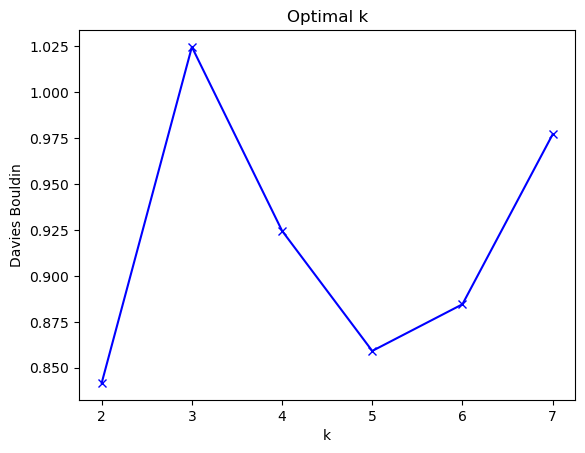

In [11]:
metrics_plots(max_k=8)

Jak widać, najlepsza ilość klastrów to 2 lub 3 - zależnie od metody. 

In [12]:
def _KMeans(X, n_clusters):
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return X, kmeans

def _MiniBatchKMeans(X, n_clusters):
    miniBatchKmeans = cluster.MiniBatchKMeans(n_clusters=n_clusters)
    miniBatchKmeans.fit(X)
    return X, miniBatchKmeans

def plot_clusters(X, model, title=""):
    if hasattr(model, 'labels_'):
        y_pred = model.labels_.astype(np)
    else:
        y_pred = model.predict(X)
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    plot2 = ax1.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_pred)
    plt.show()
    
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    ax1.view_init(90,0)
    plot2 = ax1.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_pred)
    plt.show()
    
    fig = plt.figure()
    ax1 = plt.axes(projection='3d')
    ax1.view_init(0,90,0)
    plot2 = ax1.scatter3D(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y_pred)
    plt.show()
    

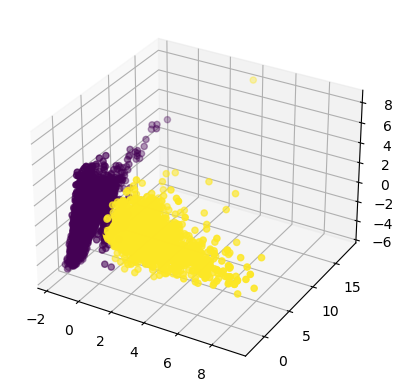

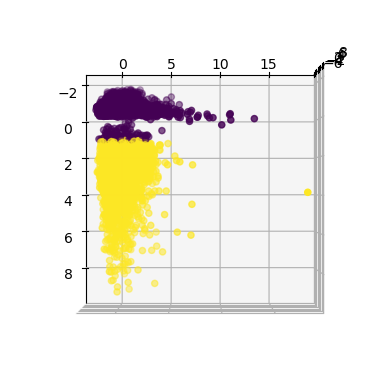

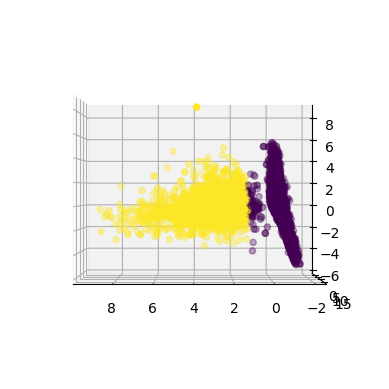

In [13]:
X, model = _KMeans(X,2)
plot_clusters(X, model, title="k-means")

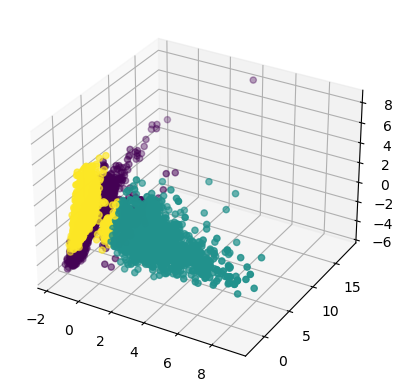

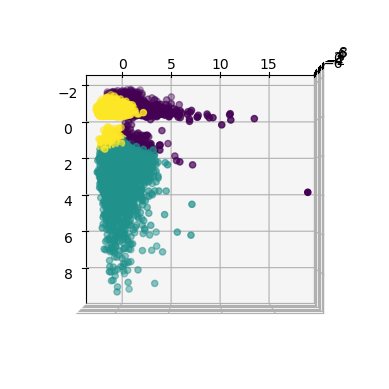

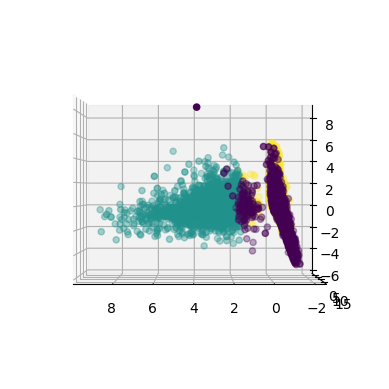

In [14]:
X, model = _KMeans(X,3)
plot_clusters(X, model, title="k-means")

# GMM

In [15]:
def _GMM(X, n_components, covariance_type='full'):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X)
    return X, gmm

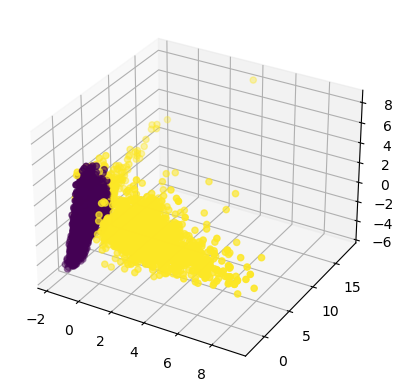

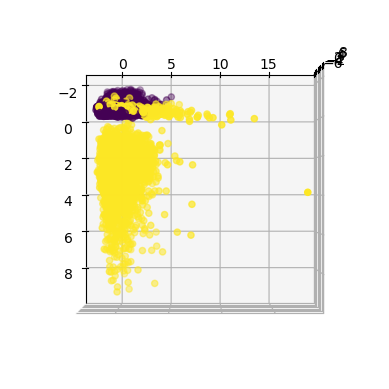

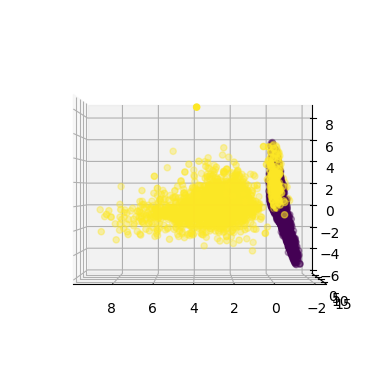

In [16]:
X, model2 = _GMM(X,2)
plot_clusters(X, model2, title="GMM")

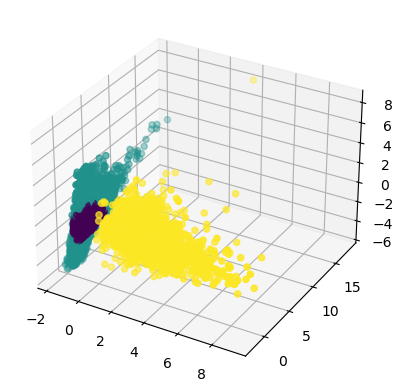

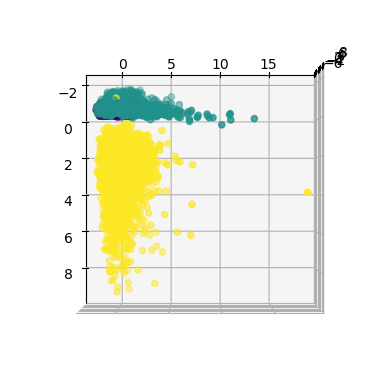

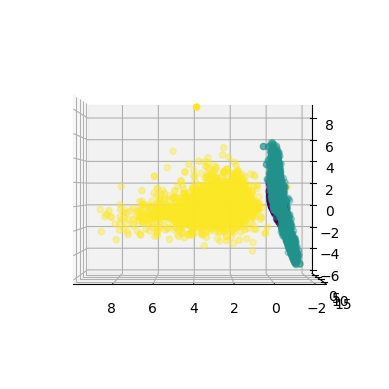

In [17]:
X, model2 = _GMM(X,3)
plot_clusters(X, model2, title="GMM")